In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ase.io.gaussian import read_gaussian_out

In [86]:
ga_directory = "/gss_gpfs_scratch/harms.n/conformers/"
benchmark_directory = "/gss_gpfs_scratch/harms.n/conformers/database_optimizations/"

In [3]:
import os

In [105]:
b = []
for f in os.listdir(benchmark_directory):
    if f.endswith(".log"): 
        try:
            a = read_gaussian_out(os.path.join(benchmark_directory, f))
            pe = a.get_potential_energy()
            aa = f[:3]
            num = f.split(".")[-2]
            b.append([aa, int(num), pe])
        except IndexError:
            print "We had an error with {}".format(f)
benchmarks = np.array(b)
benchmarks

We had an error with trp_uncapped_bare_conformer.0023.log
We had an error with phe_uncapped_bare_conformer.0025.log
We had an error with val_uncapped_bare_conformer.0011.log
We had an error with leu_uncapped_bare_conformer.0032.log
We had an error with leu_uncapped_bare_conformer.0020.log
We had an error with leu_uncapped_bare_conformer.0015.log
We had an error with val_uncapped_bare_conformer.0014.log


array([['ala', '6', '-8809.19175097'],
       ['trp', '10', '-18676.0152127'],
       ['ile', '8', '-12017.9371008'],
       ['leu', '48', '-12017.8486665'],
       ['leu', '66', '-12017.818168'],
       ['val', '2', '-10948.4009882'],
       ['leu', '46', '-12017.8488651'],
       ['phe', '8', '-15095.7187082'],
       ['leu', '78', '-12017.6947181'],
       ['ile', '21', '-12017.9098975'],
       ['ile', '47', '-12017.8059501'],
       ['val', '12', '-10948.3773333'],
       ['leu', '82', '-12017.6416668'],
       ['ala', '15', '-8808.85252567'],
       ['ile', '40', '-12017.8754343'],
       ['leu', '5', '-12017.9294761'],
       ['ile', '62', '-12017.7496279'],
       ['phe', '4', '-15095.8605748'],
       ['trp', '51', '-18675.7786125'],
       ['ile', '10', '-12017.9552753'],
       ['phe', '6', '-15095.8053194'],
       ['phe', '18', '-15095.7243165'],
       ['ile', '31', '-12017.8920823'],
       ['leu', '76', '-12017.6793137'],
       ['ala', '1', '-8809.22499784'],
       ['

In [106]:
benchmarks = pd.DataFrame(b, columns=["aa", "num", "pe"])
benchmarks = benchmarks.sort_values("aa")
benchmarks

,aa,num,pe
0,ala,6,-8809.191751
149,ala,11,-8809.024842
147,ala,8,-8809.146055
36,ala,9,-8809.168942
139,ala,13,-8808.971363
174,ala,5,-8809.194562
29,ala,14,-8808.932331
52,ala,10,-8809.001383
24,ala,1,-8809.224998
115,ala,4,-8809.197808


In [104]:
ga_directory
b = []
for f in os.listdir(ga_directory):
    if f.endswith(".log") and not f.startswith("aa"): 
        try:
            a = read_gaussian_out(os.path.join(ga_directory, f))
            pe = a.get_potential_energy()
            aa, m, gen, num = f.split(".")[0].split("_")
            b.append([aa.lower(), m, int(gen), int(num), pe])
        except IndexError:
            pass
            #print "We had an error with {}".format(f)
ga_results = pd.DataFrame(b, columns=["aa", "method", "attempt", "num", "pe"])
ga_results = ga_results.sort_values("aa")
ga_results


,aa,method,attempt,num,pe
831,ala,ga,0,12,-8808.930805
632,ala,ga,0,2,-8808.996482
750,ala,ga,11,7,0.000000
523,gly,ga,5,4,-7739.517867
506,gly,ga,31,5,-7739.481094
507,gly,ga,29,16,-7739.525930
508,gly,ga,13,7,-7739.236858
509,gly,ga,25,16,-7739.599210
910,gly,ga,33,14,-7739.231873
511,gly,ga,39,6,-7739.552469


In [103]:
attempts = ga_results[ga_results.aa =="Gly"].attempt
attempts.unique()
attempts

415     15
504     16
506     31
507     29
508     13
509     25
910     34
511     39
513     43
515      9
517     31
518     13
519     13
520     27
909     33
523      5
524      9
525      4
516      7
503     44
502     44
501     24
477      1
478     19
479     43
480     33
918     40
482     15
917     49
484     49
        ..
261     19
259     42
54      28
255     17
253     46
48      22
276     44
981      8
289     25
288      3
287     20
286     47
1031    33
978     33
57      27
283     38
282     24
281     31
1026    32
249     36
250     49
41      15
260     40
43      39
45      49
277     43
279      7
980     46
278     28
55      29
Name: attempt, Length: 616, dtype: object

In [107]:
smiles_dict = {
    "Phe" : "NC(CC1=CC=CC=C1)C(=O)O",
    "Gly" : "NCCC(=O)O",
    "Ala" : "NC(C)C(=O)O",
    "Ile" : "NC(C(C)CC)C(=O)O",
    "Leu" : "NC(CC(C)C)C(=O)O",
    "Val" : "NC(C(C)C)C(=O)O",
    "Trp" : "NC(CC1=CNC2=C1(C=CC=C2))C(=O)O"
}

In [145]:
from ase import units


In [172]:
parity = []
average = []
for name in smiles_dict.iterkeys():
    name = name.lower()
    print name
    if name in ga_results.aa.unique():
        for i, num in enumerate(ga_results[ga_results.aa == name].num.unique()):
            master_min = benchmarks[benchmarks.aa == name].min().pe
            ga_min = ga_results[(ga_results.num == num) & (ga_results.aa == name) & (ga_results.pe < -1) & (ga_results.pe > master_min-100)].min().pe
            parity.append([name, "ga", -1. * float(master_min) * (((units.kcal) / (units.mol)) / (units.eV)), 
                           -1 * float(ga_min) * (((units.kcal) / (units.mol)) / (units.eV))])
            
            master_average = benchmarks[benchmarks.aa == name].mean().pe
            ga_average = ga_results[(ga_results.num == num) & (ga_results.aa == name) & (ga_results.pe < -1) & (ga_results.pe > master_min-100)].mean().pe
            
            average.append([name, "ga", -1. * float(master_average) * (((units.kcal) / (units.mol)) / (units.eV)), 
                           -1 * float(ga_average) * (((units.kcal) / (units.mol)) / (units.eV))])
            if i > 8:
                break
parity = pd.DataFrame(parity, columns=["aa", "type", "master", "calculated"])
average = pd.DataFrame(average, columns=["aa", "type", "master", "calculated"])
parity
    

ile
val
phe
ala
gly
leu
trp


,aa,type,master,calculated
0,ile,ga,521.148756,521.148705
1,ile,ga,521.148756,521.135383
2,ile,ga,521.148756,521.146344
3,ile,ga,521.148756,521.146732
4,ile,ga,521.148756,521.144963
5,ile,ga,521.148756,521.147826
6,ile,ga,521.148756,521.145620
7,ile,ga,521.148756,521.148817
8,ile,ga,521.148756,521.147171
9,ile,ga,521.148756,521.147506


In [147]:
ga_results[(ga_results.aa == 'gly') & (ga_results.pe < -1) & (ga_results.pe > -10000)].min().pe

-7739.600701314306

Text(0.5,0,'Minimum published Potential Energy ($kcal/mol$)')

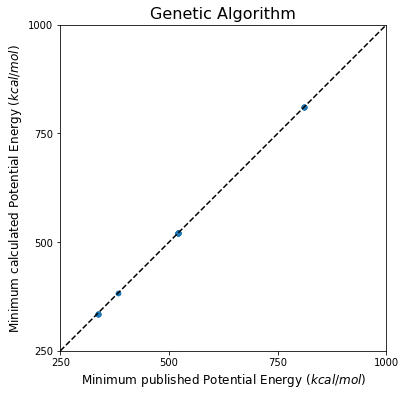

In [178]:

ax = parity[parity.type == "ga"].plot.scatter(x="master", y="calculated", figsize=(6,6))

ax.set_ylim([7500, 20000])
ax.set_xlim([7500, 20000])
ax.axis("square")
ax.plot([250, 1000],[250, 1000], "k--" ,)
ax.set_title("Genetic Algorithm", fontdict={"size":16})

ax.set_xlim([250, 1000])
ax.set_ylim([250, 1000])
ax.set_xticks([250, 500,750, 1000])
ax.set_yticks([250, 500,750, 1000])
ax.set_ylabel("Minimum calculated Potential Energy ($kcal/mol$)", fontdict={"size":12})
ax.set_xlabel("Minimum published Potential Energy ($kcal/mol$)", fontdict={"size":12})


Text(0.5,0,'Published Potential Energy ($J/mol$)')

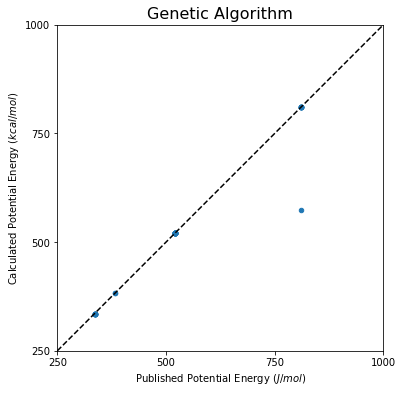

In [174]:

ax = average[average.type == "ga"].plot.scatter(x="master", y="calculated", figsize=(6,6))

ax.set_ylim([7500, 20000])
ax.set_xlim([7500, 20000])
ax.axis("square")
ax.plot([250, 1000],[250, 1000], "k--" ,)
ax.set_title("Genetic Algorithm", fontdict={"size":16})

ax.set_xlim([250, 1000])
ax.set_ylim([250, 1000])
ax.set_xticks([250, 500,750, 1000])
ax.set_yticks([250, 500,750, 1000])
ax.set_ylabel("Calculated Potential Energy ($kcal/mol$)")
ax.set_xlabel("Published Potential Energy ($J/mol$)")


In [53]:
ax = parity[parity.type == "es"].plot.scatter(x="master", y="calculated", figsize=(6,6))

ax.set_ylim([7500, 20000])
ax.set_xlim([7500, 20000])
ax.axis("square")
ax.plot([250, 1000],[250, 1000], "k--" ,)
ax.set_title("Genetic Algorithm", fontdict={"size":16})

ax.set_xlim([250, 1000])
ax.set_ylim([250, 1000])
ax.set_xticks([250, 500,750, 1000])
ax.set_yticks([250, 500,750, 1000])
ax.set_ylabel("Calculated Potential Energy ($kcal/mol$)")
ax.set_xlabel("Published Potential Energy ($J/mol$)")

-8809.217626273585

In [58]:
print len("/gss_gpfs_scratch/harms.n/conformers/database_optimizations/")
f.strip("/gss_gpfs_scratch/harms.n/conformers/database_optimizations/")

60


'la_uncapped_bare_conformer.0002.l'

In [61]:
fi = f[60:]
fi[:3]

'ala'

In [117]:
ga_results.aa.unique()

array(['ala', 'gly', 'ile', 'leu', 'trp'], dtype=object)